# Novel BGC candidates overview

In [822]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from IPython.core.display import display, HTML
import seaborn as sns
import sys
sys.path.append('../bgc_detection/candidates')
from candidate_regions import candidate_regions
from biosynthetic_pfams import AS_BIO_PFAM_IDS
from ipywidgets import interact
from Bio import SeqIO
import matplotlib
font = {'family' : 'Arial', 'size'   : 12}
matplotlib.rc('font', **font)

In [673]:
import sys

sys.path.append('../bgc_detection/similarity')
import group_scatter_plot

from group_scatter_plot import group_scatter_plot, apply_group_color

In [674]:
pfams = pd.read_csv('../data/pfam/Pfam-A.clans.csv').set_index('pfam_id')
pfams.head(1)

,clan_id,description
pfam_id,,
PF00001,CL0192,7 transmembrane receptor (rhodopsin family)


In [675]:
DEEPBGC_PATH = '128lstm-100pfamdim-8pfamiter-posweighted-neg-10k-fpr2'

In [947]:
paths = [
    '{}/candidates.csv'.format(DEEPBGC_PATH),
    'antismash-minimal/candidates.csv',
    'antismash-clusterfinder/candidates.csv',
    #'antismash-clusterfinder-default/candidates.csv',
    #'antismash-export/candidates.csv',
    #'hmm_clusterfinder-tpr80-postproc/candidates.csv'
]
labels = [
    'DeepBGC',
    'antiSMASH',
    'ClusterFinder',
    #'antiSMASH+ClusterFinder',
    #'antiSMASH export'
    #'HMM Clusterfinder tpr=80%'
]
MODEL_COLORS = {
    'DeepBGC': 'red',
    'antiSMASH': 'orange',
    'ClusterFinder': 'dodgerblue'
}
colors = [MODEL_COLORS[l] for l in labels]


In [922]:
BIO_COLORS = {
        'Polyketide' : 'deeppink',
        'NRP' : 'lime',
        'RiPP' : 'blue',
        'Other' : 'darkcyan',
        'Saccharide' : 'orange',
        'Terpene': 'turquoise',
        'Alkaloid' : 'purple',
        'No class' : 'grey',
    'No confident class' : 'grey',
        'Hybrids' : 'yellow',
}
ACT_COLORS = {
    'Antibacterial': 'deeppink',
    'Antifungal': 'orange',
    'Cytotoxic': 'blue',
    'Inhibitor': 'darkcyan',
    'No class' : 'grey',
    'No confident class' : 'grey',
    'Hybrids' : 'yellow'
}
SPECIES = [
    'Mycobacterium','Bacillus','Pseudomonas','Streptomyces','Salmonella',
    'Escherichia','Paenibacillus','Amycolatopsis','Staphylococcus','Clostridium',
    'Xanthomonas','Klebsiella','Frankia','Nocardia'
]
SPECIES_COLORS = {s: matplotlib.cm.tab20.colors[i] for i, s in enumerate(SPECIES)}

In [679]:
candidates = []
for path, label in zip(paths, labels):
    cands = pd.read_csv('../data/bacteria/candidates/{}'.format(path))
    cands['model'] = label
    candidates.append(cands)
candidates = pd.concat(candidates)
candidates.groupby('model').size()

model
ClusterFinder    62491
DeepBGC          10926
antiSMASH        13865
dtype: int64

In [680]:
deepbgc = pd.read_csv('../data/bacteria/candidates/{}/candidates_merged.csv'.format(DEEPBGC_PATH))
deepbgc.head()

,candidate_hash,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,classes,Antibacterial,...,candidate_id,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids
0,000749207dc6a8d25a7b67282a2fe375,0.00,0.00,0.06,0.000,0.000,0.940,0.00,Saccharide,0.410000,...,CP000970.1(1023496-1046922),0.988859,23427,1023496,1046922,10,55,17,CP000970_941;CP000970_943;CP000970_944;CP00097...,PF13439;PF13692;PF00534;PF00535;PF13641;PF1011...
1,00244b39ef89b1f18ccf4da018657383,0.01,0.02,0.18,0.250,0.020,0.609,0.01,Saccharide,0.583750,...,CP002727.1(1814667-1822576),0.950768,7910,1814667,1822576,6,18,7,CP002727_1673;CP002727_1674;CP002727_1675;CP00...,PF03808;PF01050;PF00483;PF12804;PF07883;PF0231...
2,0024a1c619f0dba6e8420c60b6c815e7,0.00,0.92,0.02,0.030,0.030,0.000,0.00,NRP,0.710000,...,CP010089.1(2566479-2595429),0.970932,28951,2566479,2595429,4,28,7,CP010089_2573;CP010089_2574;CP010089_2575;CP01...,PF07690;PF05977;PF13347;PF00501;PF13193;PF0066...
3,002d6748dad4145b1f09ca9dc93ead44,0.00,0.04,0.05,0.076,0.044,0.780,0.01,Saccharide,0.441667,...,CP002955.1(897167-922922),0.979748,25756,897167,922922,8,33,16,CP002955_767;CP002955_768;CP002955_769;CP00295...,PF11721;PF13229;PF13524;PF13692;PF00534;PF0301...
4,003041bd79286a337bdd94c332198c33,0.01,0.00,0.03,0.070,0.010,0.870,0.01,Saccharide,0.560000,...,CP004372.1(1146582-1184447),0.991482,37866,1146582,1184447,14,51,21,CP004372_1113;CP004372_1115;CP004372_1116;CP00...,PF02397;PF13579;PF13439;PF13692;PF00534;PF1347...


In [924]:
len(deepbgc)

10926

In [681]:
all_classes = (deepbgc[['Alkaloid','NRP','Other','Polyketide','RiPP','Saccharide','Terpene','Antibacterial','Cytotoxic','Inhibitor','Antifungal']] >= 0.5).astype(np.int)
all_classes.head()

,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,Antibacterial,Cytotoxic,Inhibitor,Antifungal
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0


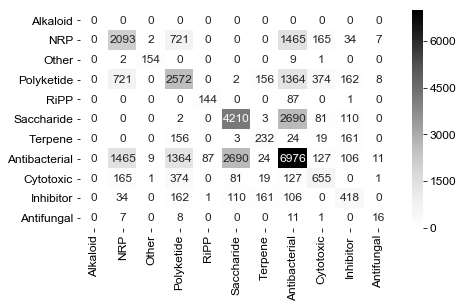

In [682]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.heatmap(all_classes.T.dot(all_classes), annot=True, fmt='.0f', cmap='Greys', ax=ax)

In [683]:
def plot_regions(cands, highlight_cand=None, start=None, end=None):
    if start:
        cands = cands[cands['nucl_end'] >= start]
    if end:
        cands = cands[cands['nucl_start'] <= end]
    fig = candidate_regions(cands, colors={m: c for m, c in zip(labels, colors)}, xlim=start or 0)
    if highlight_cand is not None:
        plt.axvspan(highlight_cand['nucl_start'], highlight_cand['nucl_end'], color='green', alpha=0.2)
    return fig

In [684]:
def plot_candidate_region(candidate_hash, start=None, end=None):
    cand = deepbgc[deepbgc['candidate_hash']==candidate_hash].iloc[0]
    cands = candidates[candidates['contig_id']==cand['contig_id']]
    return plot_regions(cands, highlight_cand=cand, start=start, end=end)

# DeepBGC Novel candidates

In [685]:
mibig = pd.read_csv('../data/mibig/mibig_properties.csv').set_index('contig_id')
mibig.head()

,BGC_ID,num_proteins,classes,source,species
contig_id,,,,,
BGC0000001.1,BGC0000001,28,Polyketide,Verrucosispora maris AB-18-032,Verrucosispora
BGC0000002.1,BGC0000002,34,Polyketide,Kutzneria albida DSM 43870,Kutzneria
BGC0000003.1,BGC0000003,6,Polyketide,Alternaria alternata,Alternaria
BGC0000004.1,BGC0000004,23,Polyketide,Aspergillus oryzae,Aspergillus
BGC0000005.1,BGC0000005,1,Polyketide,Aspergillus parasiticus,Aspergillus


In [797]:
novel = pd.read_csv('../data/bacteria/candidates/{}/novel.csv'.format(DEEPBGC_PATH))
print(len(novel))
novel.head()

566


,candidate_hash,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,classes,Antibacterial,...,candidate_id,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids
0,0289639a11eb66fdf05558583f9a45a3,0.04,0.040000,0.194961,0.259762,0.30,0.04,0.259331,NaN,0.360000,...,CP004886.1(1996131-2060701),0.952772,64571,1996131,2060701,1,77,53,CP004886_2410;CP004886_2411;CP004886_2412;CP00...,PF03007;PF03007;PF06974;PF03007;PF16817;PF0190...
1,5a2182c16f4ab87f299bf25f31225f87,0.01,0.010000,0.208003,0.305182,0.33,0.01,0.241884,NaN,0.390000,...,CP003494.1(1693261-1753880),0.961767,60620,1693261,1753880,1,70,48,CP003494_1606;CP003494_1607;CP003494_1608;CP00...,PF00934;PF03007;PF06974;PF16817;PF01906;PF0184...
2,f3f2b5cb55121b1bea879afa884e3ab3,0.00,0.010000,0.040000,0.030000,0.01,0.91,0.000000,Saccharide,0.600000,...,CP008802.1(946248-984397),0.985270,38150,946248,984397,15,90,25,CP008802_802;CP008802_803;CP008802_804;CP00880...,PF12804;PF00483;PF04321;PF01370;PF13460;PF0107...
3,f1ca8035648e3be253f1e5ee8e52459c,0.00,0.074303,0.350000,0.095697,0.29,0.04,0.170000,NaN,0.403500,...,CP006936.1(3460480-3493402),0.963722,32923,3460480,3493402,2,32,25,CP006936_3288;CP006936_3289;CP006936_3291;CP00...,PF02405;PF12680;PF07366;PF16859;PF00440;PF1397...
4,53d05d64e99c1b41d78210f57b6201e6,0.02,0.245500,0.129833,0.544667,0.06,0.06,0.040000,Polyketide,0.333333,...,CP003233.1(2146676-2176897),0.957012,30222,2146676,2176897,8,35,23,CP003233_2275;CP003233_2278;CP003233_2279;CP00...,PF01266;PF00890;PF14081;PF00141;PF01475;PF0197...


227

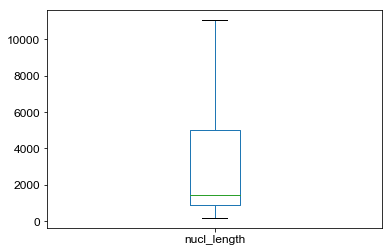

In [687]:
ax = novel['nucl_length'].plot.box(showfliers=False)

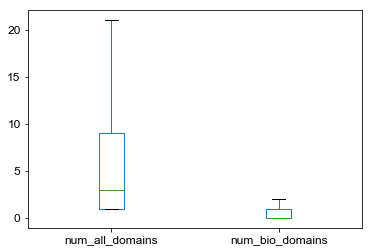

In [688]:
ax = novel[['num_all_domains','num_bio_domains']].plot.box(showfliers=False)


In [689]:
novel_all_classes = (novel[['Alkaloid','NRP','Other','Polyketide','RiPP','Saccharide','Terpene','Antibacterial','Cytotoxic','Inhibitor','Antifungal']] >= 0.5).astype(np.int)
novel_all_classes.head()

,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,Antibacterial,Cytotoxic,Inhibitor,Antifungal
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


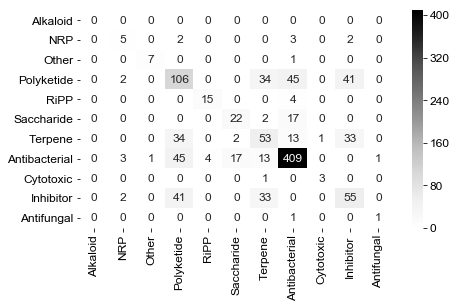

In [690]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.heatmap(novel_all_classes.T.dot(novel_all_classes), annot=True, fmt='.0f', cmap='Greys', ax=ax)

## Biosynthetic class distribution

In [917]:
def plot_class_counts(classes, colors, group_hybrids=False, title='', ax=None):
    classes = classes.fillna('No confident class')
    if group_hybrids:
        classes = classes.apply(lambda c: 'Hybrids' if ';' in c else c)
    class_counts = classes.value_counts()
    c = [colors.get(c, 'white') for c in class_counts.index]
    total = class_counts.sum()
    l = ['{} ({:.0%})'.format(c,v/total) for c,v  in class_counts.items()]
    ax = class_counts.plot.pie(wedgeprops=dict(width=0.5), ax=ax, colors=c, labels=l)
    ax.set_ylabel('')
    ax.set_xlabel(title)

In [856]:
def plot_species_counts(species, title='', ax=None):
    species = species.apply(lambda species: species.split('_')[0])
    top_species = species.value_counts()[:10].index
    top_species_counts = species.apply(lambda s: s if s in top_species else 'Others').value_counts()
    c = [SPECIES_COLORS.get(c, 'lightgrey') for c in top_species_counts.index]
    total = top_species_counts.sum()
    l = ['{} ({:.0%})'.format(c,v/total) for c,v  in top_species_counts.items()]
    ax = top_species_counts.plot.pie(wedgeprops=dict(width=0.5), colors=c, labels=l, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(title)

## Activity class distribution

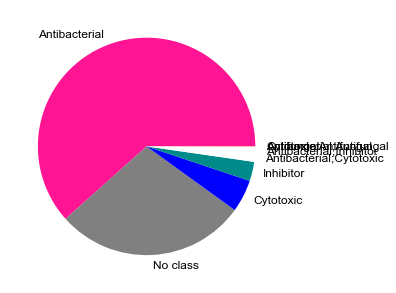

In [694]:
plot_class_counts(deepbgc['classes1'], ACT_COLORS)

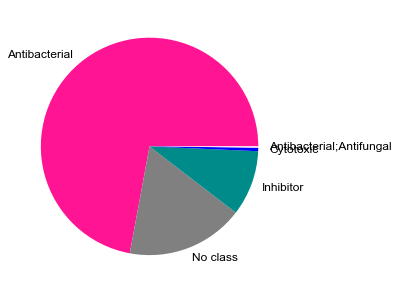

In [693]:
plot_class_counts(novel['classes1'], ACT_COLORS)

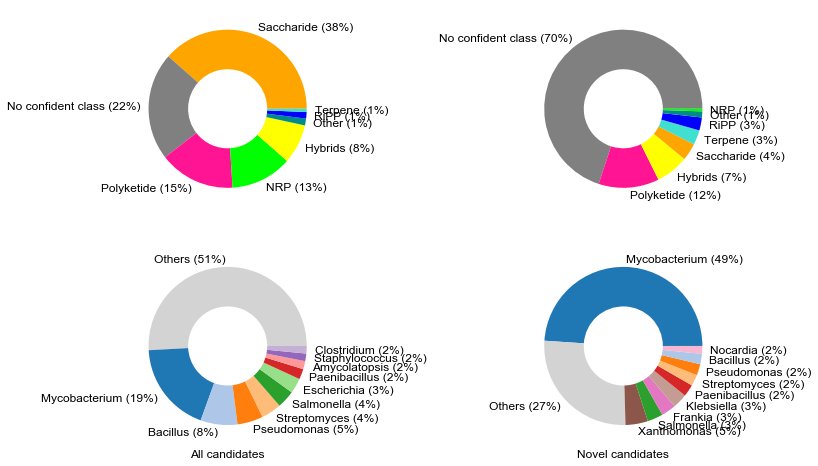

In [923]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
plot_class_counts(deepbgc['classes'], BIO_COLORS, group_hybrids=True, ax=axes[0][0])
plot_class_counts(novel['classes'], BIO_COLORS, group_hybrids=True, ax=axes[0][1])

plot_species_counts(deepbgc['species'], title='All candidates', ax=axes[1][0])
plot_species_counts(novel['species'], title='Novel candidates', ax=axes[1][1])

fig.savefig('../data/figures/paper/supplementary/10a.pdf', bbox_inches='tight')

In [925]:
def plot_heatmap(heatmap_cands, columns=None, **kwargs):
    heatmap = pd.DataFrame()
    top_species = species.value_counts()[:10].index
    heatmap['species'] = heatmap_cands['species'].apply(lambda species: species.split('_')[0]).apply(lambda s: s if s in top_species else 'Others')
    heatmap['classes'] = heatmap_cands['classes'].fillna('No confident class')
    heatmap = heatmap.pivot_table(values='species', index='species', columns=['classes'], aggfunc=len)
    if columns is not None:
        heatmap = heatmap.transpose().loc[columns].fillna(0).transpose()
    heatmap = heatmap.fillna(0).astype(np.int)
    heatmap = heatmap.loc[top_species.tolist() + ['Others']]
    heatmap = heatmap.apply(lambda row: row / row.sum(), axis=1)
    sns.heatmap(heatmap, annot=True, fmt='.0%', cmap='Greys', **kwargs)

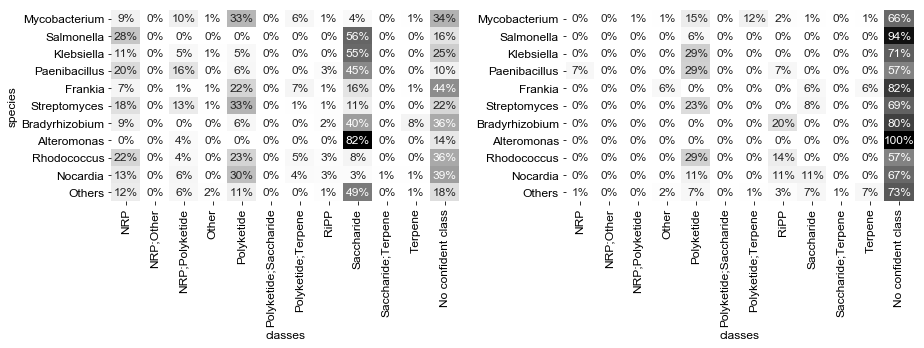

In [927]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
columns = deepbgc['classes'].sort_values().fillna('No confident class').unique()
plot_heatmap(deepbgc, columns=columns, ax=axes[0], cbar=False)
plot_heatmap(novel, columns=columns, ax=axes[1], cbar=False)
axes[1].set_ylabel('')
plt.tight_layout()
fig.savefig('../data/figures/paper/supplementary/10b.pdf', bbox_inches='tight')

/Users/prihodad/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5, 0.98, '')

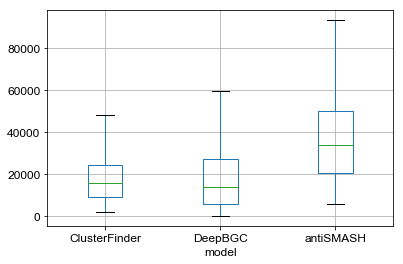

In [935]:
ax = candidates.boxplot('nucl_length', by='model', showfliers=False)
ax.set_title('')
ax.figure.suptitle('')

In [966]:
def plot_coverage_distribution(coverage, figsize=(10, 2), cov_lim=None, cov_step=100, ax=None):
    dist = []
    thresholds = np.arange(0, 1, 0.001)
    for threshold in thresholds:
        num_over_threshold = coverage[coverage['coverage'] > threshold].groupby('model').size()
        dist.append(num_over_threshold)
    dist = pd.DataFrame(dist, index=thresholds)

    for i, name in enumerate(dist.columns):
        color = MODEL_COLORS.get(name, 'grey')
        is_postproc = 'postproc' in name
        linestyle = '--' if is_postproc else '-'
        ax.plot(dist[name], color=color, linestyle=linestyle, lw=1)
        
    if cov_lim:
        ax.set_yticks(list(range(0, cov_lim, cov_step)))
        ax.set_ylim([0, cov_lim])
    ax.set_xlim([-0.01,1.01])
    ax.set_xticklabels(['>{:.0f}%'.format(x*100) for x in ax.get_xticks()]);
    ax.set_ylabel('# BGCs')
    ax.set_xlabel('BGC Coverage')
    plt.tight_layout()
    return fig

In [989]:
cf_as_coverage = pd.read_csv('../data/bacteria/candidates/antismash-clusterfinder/coverage_antismash.csv')
cf_as_coverage['model'] = 'antiSMASH'
cf_db_coverage = pd.read_csv('../data/bacteria/candidates/antismash-clusterfinder/coverage_deepbgc.csv')
cf_db_coverage['model'] = 'DeepBGC'
cf_coverage = pd.concat([cf_as_coverage, cf_db_coverage])
cf_coverage.head()

,coverage,any_exact,max_covered,contig_id,nucl_start,nucl_end,nucl_length,candidate_id,classes,detection_rules,genes,subclusters,NRPSs/PKSs,signature_genes,RiPPs,predicted_structure,monomers,model
0,0.0,False,0.0,AE000511.1,196914,217910,20997,AE000511.1:196914-217910,cf_fatty_acid,NaN,ctg1_185;ctg1_186;ctg1_187;ctg1_188;ctg1_189;c...,NaN,NaN,ctg1_190;ctg1_197;ctg1_204,-,NaN,NaN,antiSMASH
1,0.0,False,0.0,AE000511.1,364402,371194,6793,AE000511.1:364402-371194,cf_putative,NaN,ctg1_347;ctg1_348;ctg1_349;ctg1_350;ctg1_351;c...,NaN,NaN,ctg1_352,-,NaN,NaN,antiSMASH
2,0.0,False,0.0,AE000511.1,582490,603729,21240,AE000511.1:582490-603729,cf_fatty_acid,NaN,ctg1_544;ctg1_545;ctg1_546;ctg1_547;ctg1_548;c...,NaN,NaN,ctg1_556;ctg1_557;ctg1_558;ctg1_565,-,NaN,NaN,antiSMASH
3,0.0,False,0.0,AE000512.1,453877,463748,9872,AE000512.1:453877-463748,cf_putative,NaN,ctg1_428;ctg1_429;ctg1_430;ctg1_431;ctg1_432;c...,NaN,NaN,ctg1_436,-,NaN,NaN,antiSMASH
4,0.0,False,0.0,AE000512.1,612804,620385,7582,AE000512.1:612804-620385,cf_putative,NaN,ctg1_574;ctg1_575;ctg1_576;ctg1_577;ctg1_578;c...,NaN,NaN,ctg1_577,-,NaN,NaN,antiSMASH


In [940]:
db_as_coverage = pd.read_csv('../data/bacteria/candidates/{}/coverage_antismash.csv'.format(DEEPBGC_PATH))
db_as_coverage['model'] = 'antiSMASH'
db_cf_coverage = pd.read_csv('../data/bacteria/candidates/{}/coverage_clusterfinder.csv'.format(DEEPBGC_PATH))
db_cf_coverage['model'] = 'ClusterFinder'
db_coverage = pd.concat([db_as_coverage, db_cf_coverage])
db_coverage.head()

,coverage,any_exact,max_covered,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
0,0.0,False,0.000000,AE000512.1,AE000512.1(654943-665871),8afeb1e3be53ecc97724f88a0faaf51a,0.971369,10929,654943,665871,6,27,7,AE000512_615;AE000512_616;AE000512_617;AE00051...,PF00535;PF10111;PF13439;PF13579;PF13692;PF1352...,antiSMASH
1,1.0,False,0.280181,AE000516.2,AE000516.2(103700-117529),fcf823667b7fbef4a6c7b803165b7b41,0.977752,13830,103700,117529,5,15,8,AE000516_105;AE000516_106;AE000516_107;AE00051...,PF02720;PF02720;PF00823;PF02668;PF10862;PF1319...,antiSMASH
2,0.0,False,0.000000,AE000516.2,AE000516.2(268777-282728),a85b14dc0a637ed31e25ac57bf78c2a5,0.949831,13952,268777,282728,5,16,10,AE000516_242;AE000516_244;AE000516_245;AE00051...,PF13579;PF13692;PF13439;PF13524;PF00534;PF1127...,antiSMASH
3,0.0,False,0.000000,AE000516.2,AE000516.2(323452-331781),62e36433ceeb2caaaeab262312897ffb,0.944847,8330,323452,331781,6,12,7,AE000516_288;AE000516_289;AE000516_290;AE00051...,PF01896;PF13193;PF00501;PF02771;PF02770;PF0802...,antiSMASH
4,0.0,False,0.000000,AE000516.2,AE000516.2(625924-644164),76b6b525a1dd082f5a157d44bd33316b,0.956126,18241,625924,644164,11,30,15,AE000516_564;AE000516_565;AE000516_566;AE00051...,PF08541;PF08545;PF00108;PF08392;PF00195;PF0104...,antiSMASH


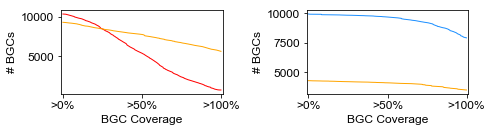

In [955]:
fig, axes = plt.subplots(1, 2, figsize=(7, 2))
plot_coverage_distribution(cf_coverage, ax=axes[0])
plot_coverage_distribution(db_coverage, ax=axes[1]);

# Selected candidates

In [697]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import FeatureLocation
import matplotlib.transforms as transforms
from dna_features_viewer import BiopythonTranslator, GraphicRecord, GraphicFeature

result_path = '../data/bacteria/candidates/{}/novel.gbk'.format(DEEPBGC_PATH)

In [698]:
"""
Credits: DNA features viewer
From: https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator

from dna_features_viewer.tools import (change_luminosity, get_text_box, compute_features_levels,
                    bokeh_feature_patch)
from dna_features_viewer.biotools import extract_translation
from dna_features_viewer.GraphicFeature import GraphicFeature

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import FeatureLocation, SeqFeature
from Bio.Alphabet import DNAAlphabet

import pandas as pd

class CustomGraphicRecord(GraphicRecord):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def plot_feature(self, ax, feature, level, linewidth=1.0):
        x1, x2 = feature.start, feature.end
        if feature.open_left:
            x1 -= 1
        if feature.open_right:
            x2 += 1
        if feature.strand == -1:
            x1, x2 = x2, x1
        x1, x2 = x1 - 0.5, x2 - 0.5
        is_undirected = feature.strand not in (-1, 1)
        head_is_cut = ((feature.strand == 1 and feature.open_right) or
                       (feature.strand == -1 and feature.open_left))
        head_length = (0.001 if (is_undirected or head_is_cut) else
                       max(0.3 * feature.thickness, 5))
        
        arrowstyle = mpatches.ArrowStyle.Simple(head_width=feature.thickness,
                                                tail_width=feature.thickness,
                                                head_length=head_length)
        y = self.feature_level_width * level
        patch = mpatches.FancyArrowPatch([x1, y], [x2, y],
                                         shrinkA=0.0, shrinkB=0.0,
                                         arrowstyle=arrowstyle,
                                         facecolor=feature.color, zorder=0,
                                         linewidth=feature.linewidth)
        ax.add_patch(patch)
        return patch


In [699]:
cand_classes = pd.read_csv('../data/bacteria/candidates/{}/classes/class-domain_set-rf/classes.csv'.format(DEEPBGC_PATH)).set_index('contig_id')['classes']
cand_classes.head()

contig_id
000749207dc6a8d25a7b67282a2fe375    Saccharide
00244b39ef89b1f18ccf4da018657383    Saccharide
0024a1c619f0dba6e8420c60b6c815e7           NRP
002d6748dad4145b1f09ca9dc93ead44    Saccharide
003041bd79286a337bdd94c332198c33    Saccharide
Name: classes, dtype: object

In [700]:
pfam_classes = pd.read_csv('../data/clusterfinder/supplement/pfam_classes.tsv', sep='\t')
pfam_classes = pfam_classes.drop_duplicates(subset=['Accession'], keep='first')
pfam_classes = pfam_classes.set_index('Accession')['Type']
pfam_classes.head()

Accession
PF00109    PKS
PF02801    PKS
PF08659    PKS
PF00378    PKS
PF08541    PKS
Name: Type, dtype: object

In [701]:
PFAM_COLORS = {
    'PKS':'darkred',
    'NRPS':'darkred',
    'Terpene':'darkred',
    'Oligosaccharide':'darkred',
    'Special':'darkred',
    'Ectoine':'darkred',
    'Siderophore':'darkred',
    'Butyrolactone':'darkred',
    'Beta-lactam':'darkred',
    'Cyclodipeptide':'darkred',
    'Aminoglycoside':'darkred',
    'Indolocarbazole':'darkred',
    'Nucleoside':'darkred',
    'Phosphoglycolipid':'darkred',
    'Redox':'blueviolet',
    'Group_Transfer':'orange',
    'Regulatory':'green',
    'Transport':'blue',
    'Ribpept':'darkred',
    'Other':'grey'
}

In [702]:
def group_genes(domains):
    first = domains.iloc[0]
    classes = pfam_classes.reindex(domains['pfam_id'].unique()).dropna().unique()
    if not len(classes):
        classes = ['Other']
    return pd.Series(dict(
        start=first['gene_start'], 
        end=first['gene_end'],
        strand=first['gene_strand'],
        pfam_ids=','.join(domains['pfam_id']),
        classes=','.join(classes),
        first_class=classes[0]
    ))

In [703]:
def plot_domain_genes(cand_domains, figure_width=10, **kwargs):
    cand_genes = cand_domains.groupby('protein_id').apply(group_genes)
    features = cand_genes.apply(lambda row: GraphicFeature(
        start=int(row['start']), 
        end=int(row['end']), 
        strand=int(row['strand']), 
        label='',
        color=PFAM_COLORS.get(row['first_class'], 'white')),
        axis=1
    )
    seq_len = cand_domains['gene_end'].max()
    graphic_record = CustomGraphicRecord(sequence_length=seq_len, features=features)
    graphic_record.feature_level_width = 0
    graphic_record.features
    ax, _ = graphic_record.plot(figure_width=figure_width, **kwargs)

    patches = []
    #patches.append(mpatches.Patch(facecolor='darkred', label='Class-specific', edgecolor='black', linewidth=1))
    for label, color in PFAM_COLORS.items():
        if label not in cand_genes['first_class'].values:
            continue
        patches.append(mpatches.Patch(facecolor=color, label=label, edgecolor='black', linewidth=1))
    
    ax.legend(handles=patches, loc='best', bbox_to_anchor=(1.1, 1), frameon=False)
    return ax.figure

def plot_genes(candidate, **kwargs):
    cand_domains = pd.read_csv('../data/bacteria/domains/{}.domains.csv'.format(candidate['contig_id']))
    cand_domains = cand_domains[cand_domains['gene_start'] >= candidate['nucl_start']]
    cand_domains = cand_domains[cand_domains['gene_end'] <= candidate['nucl_end']]
    cand_domains['gene_start'] -= candidate['nucl_start']
    cand_domains['gene_end'] -= candidate['nucl_start']
    return plot_domain_genes(cand_domains, **kwargs)

In [704]:
PALETTE = {
    'MIBiG Polyketide' : 'deeppink',
    'MIBiG NRP' : 'lime',
    'MIBiG RiPP' : 'blue',
    'MIBiG Other' : 'darkcyan',
    'MIBiG Saccharide' : 'orange',
    'MIBiG Terpene': 'turquoise',
    'MIBiG Alkaloid' : 'purple',
    'MIBiG ?' : None,
    'Predicted Polyketide' : 'deeppink:P',
    'Predicted NRP' : 'lime:P',
    'Predicted RiPP' : 'blue:P',
    'Predicted Other' : 'darkcyan:P',
    'Predicted Saccharide' : 'orange:P',
    'Predicted Terpene': 'turquoise:P',
    'Predicted Alkaloid' : 'purple:P'
}

In [705]:
len(novel[novel['num_all_domains'] >= 5])

227

In [706]:
novel_long = novel[novel['num_all_domains'] >= 5]
print(len(novel_long))
novel_long.head()

227


,candidate_hash,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,classes,Antibacterial,...,candidate_id,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids
0,0289639a11eb66fdf05558583f9a45a3,0.04,0.040000,0.194961,0.259762,0.30,0.04,0.259331,NaN,0.360000,...,CP004886.1(1996131-2060701),0.952772,64571,1996131,2060701,1,77,53,CP004886_2410;CP004886_2411;CP004886_2412;CP00...,PF03007;PF03007;PF06974;PF03007;PF16817;PF0190...
1,5a2182c16f4ab87f299bf25f31225f87,0.01,0.010000,0.208003,0.305182,0.33,0.01,0.241884,NaN,0.390000,...,CP003494.1(1693261-1753880),0.961767,60620,1693261,1753880,1,70,48,CP003494_1606;CP003494_1607;CP003494_1608;CP00...,PF00934;PF03007;PF06974;PF16817;PF01906;PF0184...
2,f3f2b5cb55121b1bea879afa884e3ab3,0.00,0.010000,0.040000,0.030000,0.01,0.91,0.000000,Saccharide,0.600000,...,CP008802.1(946248-984397),0.985270,38150,946248,984397,15,90,25,CP008802_802;CP008802_803;CP008802_804;CP00880...,PF12804;PF00483;PF04321;PF01370;PF13460;PF0107...
3,f1ca8035648e3be253f1e5ee8e52459c,0.00,0.074303,0.350000,0.095697,0.29,0.04,0.170000,NaN,0.403500,...,CP006936.1(3460480-3493402),0.963722,32923,3460480,3493402,2,32,25,CP006936_3288;CP006936_3289;CP006936_3291;CP00...,PF02405;PF12680;PF07366;PF16859;PF00440;PF1397...
4,53d05d64e99c1b41d78210f57b6201e6,0.02,0.245500,0.129833,0.544667,0.06,0.06,0.040000,Polyketide,0.333333,...,CP003233.1(2146676-2176897),0.957012,30222,2146676,2176897,8,35,23,CP003233_2275;CP003233_2278;CP003233_2279;CP00...,PF01266;PF00890;PF14081;PF00141;PF01475;PF0197...


#

#

#

#

#

# TODO move tsne to fpr2

#

#

#

#

#

In [708]:
tsne = pd.read_csv('../data/bacteria/candidates/novel-{}/tsne/mibig_bgcs_all.pfam2vec-mean.tsne2.csv'.format(DEEPBGC_PATH)).set_index('contig_id')
#tsne = pd.read_csv('../data/bacteria/candidates/novel-{}/tsne/mibig_bgcs_all.domain_set.tsne2.csv'.format(DEEPBGC_PATH)).set_index('contig_id')
tsne.head()

,a,b
contig_id,,
BGC0000001.1,-22.674100,-13.696586
BGC0000002.1,-34.689125,-13.690722
BGC0000003.1,-7.711694,-19.307611
BGC0000004.1,-26.408335,-0.806947
BGC0000005.1,11.892709,-31.438383


In [709]:
novel_samples = tsne.loc[novel_long['candidate_hash'].unique()].copy()
prefix = 'Predicted '
novel_samples['marker'] = 'P'
novel_samples['alpha'] = 0.8
novel_samples['size'] = 30
novel_samples['group'] = cand_classes.loc[novel_samples.index].fillna('(no class)').apply(lambda c: prefix+c.replace(';', ';'+prefix))
novel_samples['color'] = novel_samples['group'].apply(lambda g: apply_group_color(g, PALETTE))
novel_samples.head()

,a,b,marker,alpha,size,group,color
contig_id,,,,,,,
0289639a11eb66fdf05558583f9a45a3,-49.043210,13.077333,P,0.8,30,Predicted (no class),grey
5a2182c16f4ab87f299bf25f31225f87,-49.218002,13.114355,P,0.8,30,Predicted (no class),grey
f3f2b5cb55121b1bea879afa884e3ab3,21.367891,45.199375,P,0.8,30,Predicted Saccharide,orange:P
f1ca8035648e3be253f1e5ee8e52459c,-34.637905,13.503100,P,0.8,30,Predicted (no class),grey
53d05d64e99c1b41d78210f57b6201e6,-24.450462,8.060456,P,0.8,30,Predicted Polyketide,deeppink:P


In [710]:
mibig_samples = tsne.loc[mibig.index].dropna().copy()
prefix = 'MIBiG '
mibig_samples['marker'] = 'o'
mibig_samples['alpha'] = 0.15
mibig_samples['size'] = 20
mibig_samples['group'] = mibig.loc[mibig_samples.index]['classes'].apply(lambda c: prefix+c.replace(';', ';'+prefix) if isinstance(c, str) else c)
mibig_samples['color'] = mibig_samples['group'].apply(lambda g: apply_group_color(g, PALETTE))
mibig_samples.head()

,a,b,marker,alpha,size,group,color
contig_id,,,,,,,
BGC0000001.1,-22.674100,-13.696586,o,0.15,20,MIBiG Polyketide,deeppink
BGC0000002.1,-34.689125,-13.690722,o,0.15,20,MIBiG Polyketide,deeppink
BGC0000003.1,-7.711694,-19.307611,o,0.15,20,MIBiG Polyketide,deeppink
BGC0000004.1,-26.408335,-0.806947,o,0.15,20,MIBiG Polyketide,deeppink
BGC0000005.1,11.892709,-31.438383,o,0.15,20,MIBiG Polyketide,deeppink


In [711]:
first_cand = novel[novel['candidate_hash']=='ffd47679ea075ec67ed6bb995467cbcb'].iloc[0]
second_cand = novel[novel['candidate_hash']=='307e7e7ef2b7256aa60260c3f20ed974'].iloc[0]
third_cand = novel[novel['candidate_hash']=='ae833e7695e2a30dbf51c4db523a46b5'].iloc[0]
first_tsne = tsne.loc[first_cand['candidate_hash']]
second_tsne = tsne.loc[second_cand['candidate_hash']]
third_tsne = tsne.loc[third_cand['candidate_hash']]

Numeric:  ['pfam2vec mean: tsne1', 'pfam2vec mean: tsne2', 'alpha', 'size']


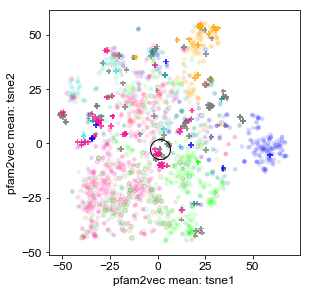

In [712]:
samples = pd.concat([mibig_samples, novel_samples])
samples = samples.rename(columns={'a': 'pfam2vec mean: tsne1', 'b': 'pfam2vec mean: tsne2'})
fig = group_scatter_plot(samples=samples, groupby='group', figure_size=4.5, verbose=0, legend_hybrids=False, legend_loc='outside best', linewidth=0.8)
fig.axes[0].plot(first_tsne['a'], first_tsne['b'], marker='o', markersize=20, markeredgecolor='black', markerfacecolor=(0,0,0,0), lw=0.5)
#fig.axes[0].plot(third_tsne['a'], third_tsne['b'], marker='o', markersize=20, markeredgecolor='red', markerfacecolor=(0,0,0,0), lw=0.5)
#fig.axes[0].set_xlim([None, 115])
#fig.axes[0].set_ylim([-65, 60])
fig.axes[0].set_xticks([-50,-25,0,25,50])
fig.axes[0].set_yticks([-50,-25,0,25,50])
fig.axes[0].get_legend().remove()
fig.savefig('../data/figures/paper/main/5a.pdf', bbox_inches='tight')

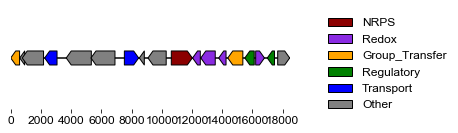

In [713]:
fig = plot_genes(novel[novel['candidate_hash']=='ffd47679ea075ec67ed6bb995467cbcb'].iloc[0], figure_width=5)
#fig.savefig('../data/figures/paper/main/5b.pdf', bbox_inches='tight')

In [1001]:
neighbors = candidates[candidates['contig_id'] == 'CP004886.1']
neighbors = neighbors[(neighbors['nucl_start'] > 270000) & (neighbors['nucl_end'] < 450000)]
neighbors = neighbors[['nucl_start','nucl_end','model','candidate_hash']].sort_values(by='nucl_start')
neighbors

,nucl_start,nucl_end,model,candidate_hash
38808,290351,306057,ClusterFinder,NaN
6482,314916,333380,DeepBGC,ffd47679ea075ec67ed6bb995467cbcb
38809,390102,404021,ClusterFinder,NaN


In [999]:
314916-306057

8859

In [998]:
390102-333380

56722

CP004886.1 of length 404021


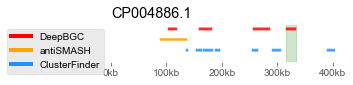

In [562]:
fig = plot_candidate_region('ffd47679ea075ec67ed6bb995467cbcb', start=0, end=450000)
fig.set_figwidth(4)
fig.set_figheight(0.75)
#fig.savefig('../data/figures/paper/main/5c.pdf', bbox_inches='tight')

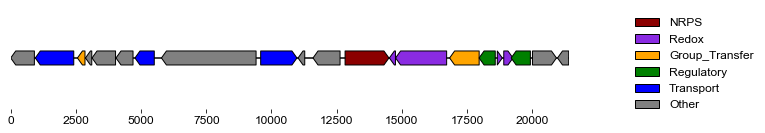

In [116]:
fig = plot_genes(novel[novel['candidate_hash']=='307e7e7ef2b7256aa60260c3f20ed974'].iloc[0])

CP003234.1 of length 403415


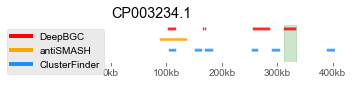

In [563]:
fig = plot_candidate_region('307e7e7ef2b7256aa60260c3f20ed974', start=0, end=450000)
fig.set_figwidth(4)
fig.set_figheight(0.75)

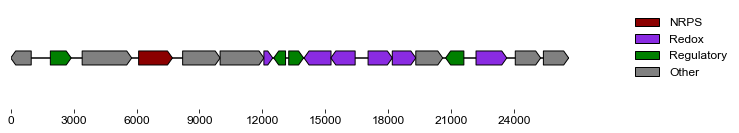

In [118]:
candidate = novel[novel['candidate_hash']=='ae833e7695e2a30dbf51c4db523a46b5'].iloc[0]
plot_genes(candidate);

CP002299.1 of length 4442946


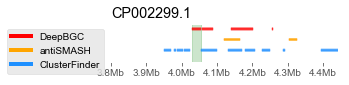

In [189]:
fig = plot_candidate_region('ae833e7695e2a30dbf51c4db523a46b5', start=3800000, end=4400000)
fig.set_figwidth(4)
fig.set_figheight(0.75)

In [97]:
# Not used, kept for reference
def plot_record_domains(record):
    translator = BiopythonTranslator()
    graphic_record = CustomGraphicRecord(sequence=record.seq, features=[translator.translate_feature(f) for f in record.features if f.type == 'CDS'])
    graphic_record.feature_level_width = 0
    for feature in graphic_record.features:
        feature.label = ''
        feature.thickness = 20
        feature.linewidth=1
    ax, _ = graphic_record.plot(figure_width=10, annotate_inline=True)
    graphic_record = CustomGraphicRecord(sequence=record.seq, features=[translator.translate_feature(f) for f in record.features if f.type == 'PFAM_domain'])
    graphic_record.feature_level_width = 2
    for feature in graphic_record.features:
        feature.label = ''
        feature.thickness = 13
        feature.color = 'orange'
        feature.linewidth=1
    ax, _ = graphic_record.plot(annotate_inline=True, ax=ax, level_offset=2)
    ax.set_ylim([-5, None])

# Similar to selected candidate

In [714]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [715]:
domain_set = pd.read_pickle('../data/bacteria/candidates/{}/domain_set.pkl'.format(DEEPBGC_PATH))
domain_set.head()

pfam_id,PF00004,PF00005,PF00006,PF00009,PF00011,PF00012,PF00013,PF00015,PF00016,PF00018,...,PF17409,PF17410,PF17418,PF17425,PF17456,PF17479,PF17508,PF17590,PF17618,PF17619
contig_id,,,,,,,,,,,,,,,,,,,,,
000749207dc6a8d25a7b67282a2fe375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00244b39ef89b1f18ccf4da018657383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0024a1c619f0dba6e8420c60b6c815e7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002d6748dad4145b1f09ca9dc93ead44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003041bd79286a337bdd94c332198c33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [716]:
first_domain_set = domain_set.loc[first_cand['candidate_hash']]
sum(first_domain_set)

23

In [717]:
first_similarity = pd.Series(cosine_similarity([first_domain_set], domain_set)[0], domain_set.index).sort_values(ascending=False)
first_similarity[:10]

contig_id
ffd47679ea075ec67ed6bb995467cbcb    1.000000
307e7e7ef2b7256aa60260c3f20ed974    0.800198
2b6c53e3e4812e6d8e813b9ab00cfb44    0.677672
f5e0ed012e76c5eda3c862febdee4e83    0.669711
257ddd67560ffe89405860edcfeec6b5    0.638915
62e36433ceeb2caaaeab262312897ffb    0.628695
205ed77242499c881cc0c1c3cdf71f89    0.613006
6ba88b1a3182d0183371fb410f9ce219    0.578315
6e6077b2b45de59b3bc8174e15ed36e1    0.551677
ad6a07c13956c21f4ea44f40fc801d58    0.541736
dtype: float64

In [972]:
cand

candidate_hash                      ad6a07c13956c21f4ea44f40fc801d58
Alkaloid                                                           0
NRP                                                         0.558429
Other                                                       0.173119
Polyketide                                                  0.268452
RiPP                                                               0
Saccharide                                                     0.005
Terpene                                                            0
classes                                                          NRP
Antibacterial                                                    0.7
Cytotoxic                                                       0.01
Inhibitor                                                       0.07
Antifungal                                                      0.05
classes1                                               Antibacterial
BGC_ID                            

Mycobacterium_tuberculosis_str._Haarlem/NITR202: Similarity 100.00%:
model
ClusterFinder    0.0
antiSMASH        0.0
Name: coverage, dtype: float64
CF prediction:  0.17490265872883534
Mycobacterium_tuberculosis_RGTB423: Similarity 80.02%:
model
ClusterFinder    0.0
antiSMASH        0.0
Name: coverage, dtype: float64
CF prediction:  0.17902029810524653
Mycobacterium_intracellulare_MOTT-64: Similarity 67.77%:
model
ClusterFinder    0.0
antiSMASH        1.0
Name: coverage, dtype: float64
CF prediction:  0.021325113847974652
Mycobacterium_avium_subsp._hominissuis_TH135_chromosomal_DNA: Similarity 66.97%:
model
ClusterFinder    0.0
antiSMASH        1.0
Name: coverage, dtype: float64
CF prediction:  0.5030428732838098
Mycobacterium_avium_104: Similarity 63.89%:
model
ClusterFinder    0.0
antiSMASH        1.0
Name: coverage, dtype: float64
CF prediction:  0.10256551329035243
Mycobacterium_tuberculosis_CDC1551: Similarity 62.87%:
model
ClusterFinder    0.0
antiSMASH        0.0
Name: coverage, 

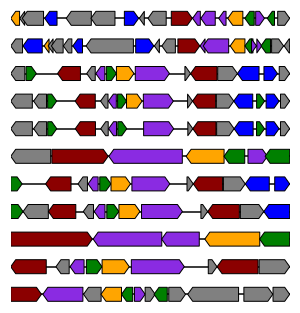

In [988]:
fig, axes = plt.subplots(11, 1, figsize=(5, 5.5))
i = 0
for candidate_hash, sim in first_similarity[:11].iteritems():
    matching = deepbgc[deepbgc['candidate_hash']==candidate_hash]
    cand = matching.iloc[0]
    novelty = db_coverage.set_index('candidate_id').loc[matching['candidate_id']].groupby('model')['coverage'].max()
    print('{}: Similarity {:.2f}%:'.format(cand['species'], sim*100))
    print(novelty)
    print('CF prediction: ', matching['cf_prediction'].max())
    plot_genes(cand, figure_width=7, ax=axes[i])
    axes[i].legend([]).remove()
    axes[i].set_xticks([])
    i += 1
fig.savefig('../data/figures/paper/supplementary/11a.pdf', bbox_inches='tight')

In [719]:
mibig_domain_set = pd.read_pickle('../data/training/positive/mibig_bgcs_all.domain_set.pkl')
mibig_domain_set.head()

pfam_id,PF00004,PF00005,PF00006,PF00009,PF00010,PF00011,PF00012,PF00013,PF00015,PF00022,...,PF17387,PF17389,PF17390,PF17391,PF17392,PF17414,PF17425,PF17508,PF17584,PF17608
contig_id,,,,,,,,,,,,,,,,,,,,,
BGC0000001.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BGC0000002.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BGC0000003.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BGC0000004.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BGC0000005.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [720]:
common_features = np.intersect1d(domain_set.columns, mibig_domain_set.columns)
first_similarity_mibig = pd.Series(cosine_similarity([first_domain_set.loc[common_features]], mibig_domain_set[common_features])[0], mibig_domain_set.index).sort_values(ascending=False)
first_similarity_mibig[:10]

contig_id
BGC0000373.1    0.389249
BGC0000961.1    0.362738
BGC0000131.1    0.353553
BGC0000312.1    0.350823
BGC0000913.1    0.333712
BGC0000328.1    0.322749
BGC0000456.4    0.316228
BGC0001253.1    0.316228
BGC0001180.2    0.316228
BGC0000095.1    0.316228
dtype: float64

BGC0000373.1: Similarity 38.92%:


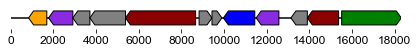

BGC0000961.1: Similarity 36.27%:


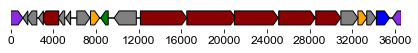

BGC0000131.1: Similarity 35.36%:


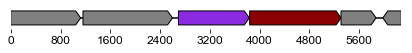

BGC0000312.1: Similarity 35.08%:


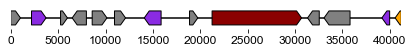

BGC0000913.1: Similarity 33.37%:


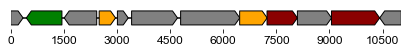

In [721]:
mibig_domains = pd.read_csv('../data/training/positive/mibig_bgcs_all.csv').groupby('contig_id')
for contig_id, sim in first_similarity_mibig[:5].iteritems():
    bgc = mibig_domains.get_group(contig_id)
    print('{}: Similarity {:.2f}%:'.format(contig_id, sim*100))
    fig = plot_domain_genes(bgc, figure_width=7)
    fig.set_figheight(0.4)
    fig.axes[0].legend([]).remove()
    plt.show()

In [722]:
deepbgc.set_index('candidate_hash').loc[first_similarity[:10].index]

,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,classes,Antibacterial,Cytotoxic,...,candidate_id,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids
candidate_hash,,,,,,,,,,,,,,,,,,,,,
ffd47679ea075ec67ed6bb995467cbcb,0.01,0.268595,0.371381,0.340024,0.00,0.031667,0.01,NaN,0.694833,0.07,...,CP004886.1(314916-333380),0.961393,18465,314916,333380,6,27,18,CP004886_368;CP004886_369;CP004886_370;CP00488...,PF13527;PF13508;PF13673;PF00583;PF02626;PF0262...
307e7e7ef2b7256aa60260c3f20ed974,0.00,0.253262,0.287048,0.449690,0.01,0.021667,0.00,NaN,0.673167,0.04,...,CP003234.1(311976-333375),0.969206,21400,311976,333375,6,27,19,CP003234_326;CP003234_327;CP003234_330;CP00323...,PF02602;PF07690;PF13347;PF02626;PF02682;PF0149...
2b6c53e3e4812e6d8e813b9ab00cfb44,0.00,0.577595,0.162452,0.259952,0.00,0.005000,0.00,NRP,0.677333,0.03,...,CP003324.1(5117291-5135252),0.960224,17962,5117291,5135252,7,17,12,CP003324_4800;CP003324_4801;CP003324_4803;CP00...,PF09995;PF00440;PF00668;PF07760;PF00903;PF1366...
f5e0ed012e76c5eda3c862febdee4e83,0.00,0.560095,0.169952,0.259952,0.00,0.005000,0.01,NRP,0.687333,0.04,...,AP012555.1(4575446-4595886),0.964836,20441,4575446,4595886,7,21,15,AP012555_4218;AP012555_4219;AP012555_4220;AP01...,PF00823;PF09995;PF00440;PF00668;PF14304;PF0090...
257ddd67560ffe89405860edcfeec6b5,0.00,0.567595,0.162452,0.259952,0.00,0.005000,0.01,NRP,0.677333,0.03,...,CP000479.1(5011141-5031539),0.962017,20399,5011141,5031539,7,20,14,CP000479_4775;CP000479_4776;CP000479_4777;CP00...,PF00823;PF09995;PF00440;PF00668;PF14304;PF0090...
257ddd67560ffe89405860edcfeec6b5,0.00,0.567595,0.162452,0.259952,0.00,0.005000,0.01,NRP,0.677333,0.03,...,CP009482.1(4797621-4817593),0.961966,19973,4797621,4817593,7,20,14,CP009482_4519;CP009482_4520;CP009482_4521;CP00...,PF00823;PF09995;PF00440;PF00668;PF14304;PF0090...
257ddd67560ffe89405860edcfeec6b5,0.00,0.567595,0.162452,0.259952,0.00,0.005000,0.01,NRP,0.677333,0.03,...,CP009493.1(4782355-4802330),0.964243,19976,4782355,4802330,7,20,14,CP009493_4522;CP009493_4523;CP009493_4524;CP00...,PF00823;PF09995;PF00440;PF00668;PF14304;PF0090...
257ddd67560ffe89405860edcfeec6b5,0.00,0.567595,0.162452,0.259952,0.00,0.005000,0.01,NRP,0.677333,0.03,...,CP009614.1(4834304-4854702),0.962074,20399,4834304,4854702,7,20,14,CP009614_4558;CP009614_4559;CP009614_4560;CP00...,PF00823;PF09995;PF00440;PF00668;PF14304;PF0090...
62e36433ceeb2caaaeab262312897ffb,0.00,0.210262,0.270298,0.519440,0.00,0.021667,0.00,Polyketide,0.650000,0.03,...,AE000516.2(323452-331781),0.944847,8330,323452,331781,6,12,7,AE000516_288;AE000516_289;AE000516_290;AE00051...,PF01896;PF13193;PF00501;PF02771;PF02770;PF0802...


# Overlap Venn diagram

In [723]:
def get_single_contig_overlap(a_cands, b_cands):
    overlaps = []
    for c, cand in a_cands.iterrows():
        # For each suitable candidate from other model
        overlap = False
        for i, other in b_cands.iterrows():
            if other['nucl_start'] < cand['nucl_end'] and other['nucl_end'] > cand['nucl_start']:
                overlap = True
                break
        overlaps.append(overlap)
    return pd.Series(overlaps, index=a_cands.index)

def get_overlap(a_cands, b_cands):
    a_grouped = a_cands.groupby('contig_id')
    b_grouped = b_cands.groupby('contig_id')

    overlaps = []
    # Get overlap separately for all contigs
    for contig_id in a_grouped.groups:
        a_contig_cands = a_grouped.get_group(contig_id)
        b_contig_cands = b_grouped.get_group(contig_id) if contig_id in b_grouped.groups else pd.DataFrame()
        overlaps.append(get_single_contig_overlap(a_contig_cands, b_contig_cands))
    return pd.concat(overlaps)

In [724]:
def get_multiple_overlaps(candidates):
    overlaps = []
    for a_model, a_cands in candidates.groupby('model'):
        overlap = pd.DataFrame()
        for b_model, b_cands in candidates.groupby('model'):
            if a_model == b_model:
                continue
            overlap[b_model] = get_overlap(a_cands, b_cands)        
        overlap['model'] = a_model
        overlap[a_model] = True
        overlaps.append(overlap)
    return pd.concat(overlaps)

In [725]:
overlaps = get_multiple_overlaps(candidates)
overlaps.head()

,ClusterFinder,DeepBGC,antiSMASH,model
0,True,False,False,ClusterFinder
1,True,False,False,ClusterFinder
2,True,False,False,ClusterFinder
3,True,False,False,ClusterFinder
4,True,False,False,ClusterFinder


In [726]:
x = deepbgc[deepbgc['coverage'] == 0].set_index('candidate_id')
len(x)

566

In [727]:
candidates[candidates['contig_id'] == 'CP002955.1'].groupby('model').size()

model
ClusterFinder    34
DeepBGC           9
antiSMASH         3
dtype: int64

CP002955.1 of length 1919915


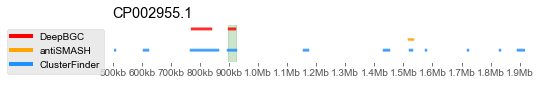

In [728]:
fig = plot_candidate_region('002d6748dad4145b1f09ca9dc93ead44', start=500000, end=2000000)
fig.set_figwidth(7)
fig.set_figheight(0.75)

In [729]:
overlap_bins = overlaps[['model']].copy()
num_overlap = overlaps.sum(axis=1)
overlap_bins['All overlap'] = num_overlap == 3
overlap_bins['Novel'] = num_overlap == 1
novel_or_all = overlap_bins['All overlap'] | overlap_bins['Novel']
overlap_bins['ClusterFinder overlap'] = overlaps['ClusterFinder'] & ~novel_or_all & (overlaps['model'] != 'ClusterFinder')
overlap_bins['DeepBGC overlap'] = overlaps['DeepBGC'] & ~novel_or_all & (overlaps['model'] != 'DeepBGC')
overlap_bins['antiSMASH overlap'] = overlaps['antiSMASH'] & ~novel_or_all & (overlaps['model'] != 'antiSMASH')
overlap_bins.head()

,model,All overlap,Novel,ClusterFinder overlap,DeepBGC overlap,antiSMASH overlap
0,ClusterFinder,False,True,False,False,False
1,ClusterFinder,False,True,False,False,False
2,ClusterFinder,False,True,False,False,False
3,ClusterFinder,False,True,False,False,False
4,ClusterFinder,False,True,False,False,False


In [730]:
overlap_counts = overlap_bins.groupby('model').sum().astype(np.int)
overlap_counts

,All overlap,Novel,ClusterFinder overlap,DeepBGC overlap,antiSMASH overlap
model,,,,,
ClusterFinder,4241,47074,0,6114,5062
DeepBGC,3862,566,6062,0,436
antiSMASH,3646,6158,3911,150,0


In [733]:
bin_colors = {
    'All overlap': '#444444',
    'Novel': '#00dd44',
    'ClusterFinder overlap': 'dodgerblue',
    'antiSMASH overlap': 'orange',
    'DeepBGC overlap': 'red',
    'ClusterFinder&DeepBGC overlap': 'purple'
}

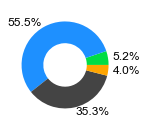

In [747]:
counts = overlap_counts.loc['DeepBGC'][['Novel','ClusterFinder overlap', 'All overlap', 'antiSMASH overlap']]
col = [bin_colors[c] for c in counts.index]
total = counts.sum()
perc = ['{:.1f}%'.format(c/total*100) for c in counts]
ax = counts.plot.pie(colors=col, wedgeprops=dict(width=0.5), labels=perc, figsize=(3, 2), legend=False)
ax.set_ylabel('')
ax.figure.savefig('../data/figures/paper/main/5x.pdf', bbox_inches='tight')

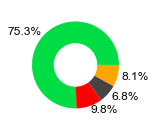

In [748]:
counts = overlap_counts.loc['ClusterFinder'][['Novel','DeepBGC overlap', 'All overlap', 'antiSMASH overlap']]
col = [bin_colors[c] for c in counts.index]
total = counts.sum()
perc = ['{:.1f}%'.format(c/total*100) for c in counts]
ax = counts.plot.pie(colors=col, wedgeprops=dict(width=0.5), labels=perc, figsize=(3, 2), legend=False)
ax.set_ylabel('')
ax.figure.savefig('../data/figures/paper/main/5y.pdf', bbox_inches='tight')

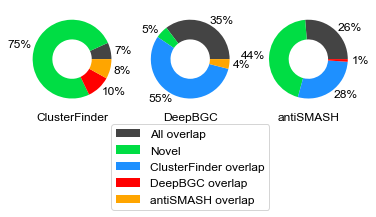

In [743]:
fig, axes = plt.subplots(1, len(overlap_counts), figsize=(6, 5))
i = 0
for model, counts in overlap_counts.iterrows():
    col = [bin_colors[c] for c in overlap_counts.columns]
    total = counts.sum()
    perc = ['{:.0f}%'.format(c/total*100) for c in counts]
    ax = counts.plot.pie(colors=col, wedgeprops=dict(width=0.5), ax=axes[i], labels=perc)
    lgnd = ax.legend(overlap_counts.columns, loc='upper center', bbox_to_anchor=(0.5, -0.1))
    if i != 1:
        lgnd.remove()
    ax.set_ylabel('')
    ax.set_xlabel(model)
    i += 1
#plt.tight_layout()

In [417]:
fig.savefig('../data/figures/paper/main/5x.pdf', bbox_inches='tight')